## Old stuff

77 edges


/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


YPD
-0.10448014617941266 0.07028897835816353
IM 218 coeffs, mean -0.017385738482704825  std dev: 0.027893017864348585
FM 140 coeffs, mean -0.011658908801464477  std dev: 0.027263344249044044
73 edges
SC
-0.24865240742142342 0.13920962735583658
IM 182 coeffs, mean 0.004872649971101678  std dev: 0.05282332959741453
FM 88 coeffs, mean -0.017874260166303557  std dev: 0.05030513301787589


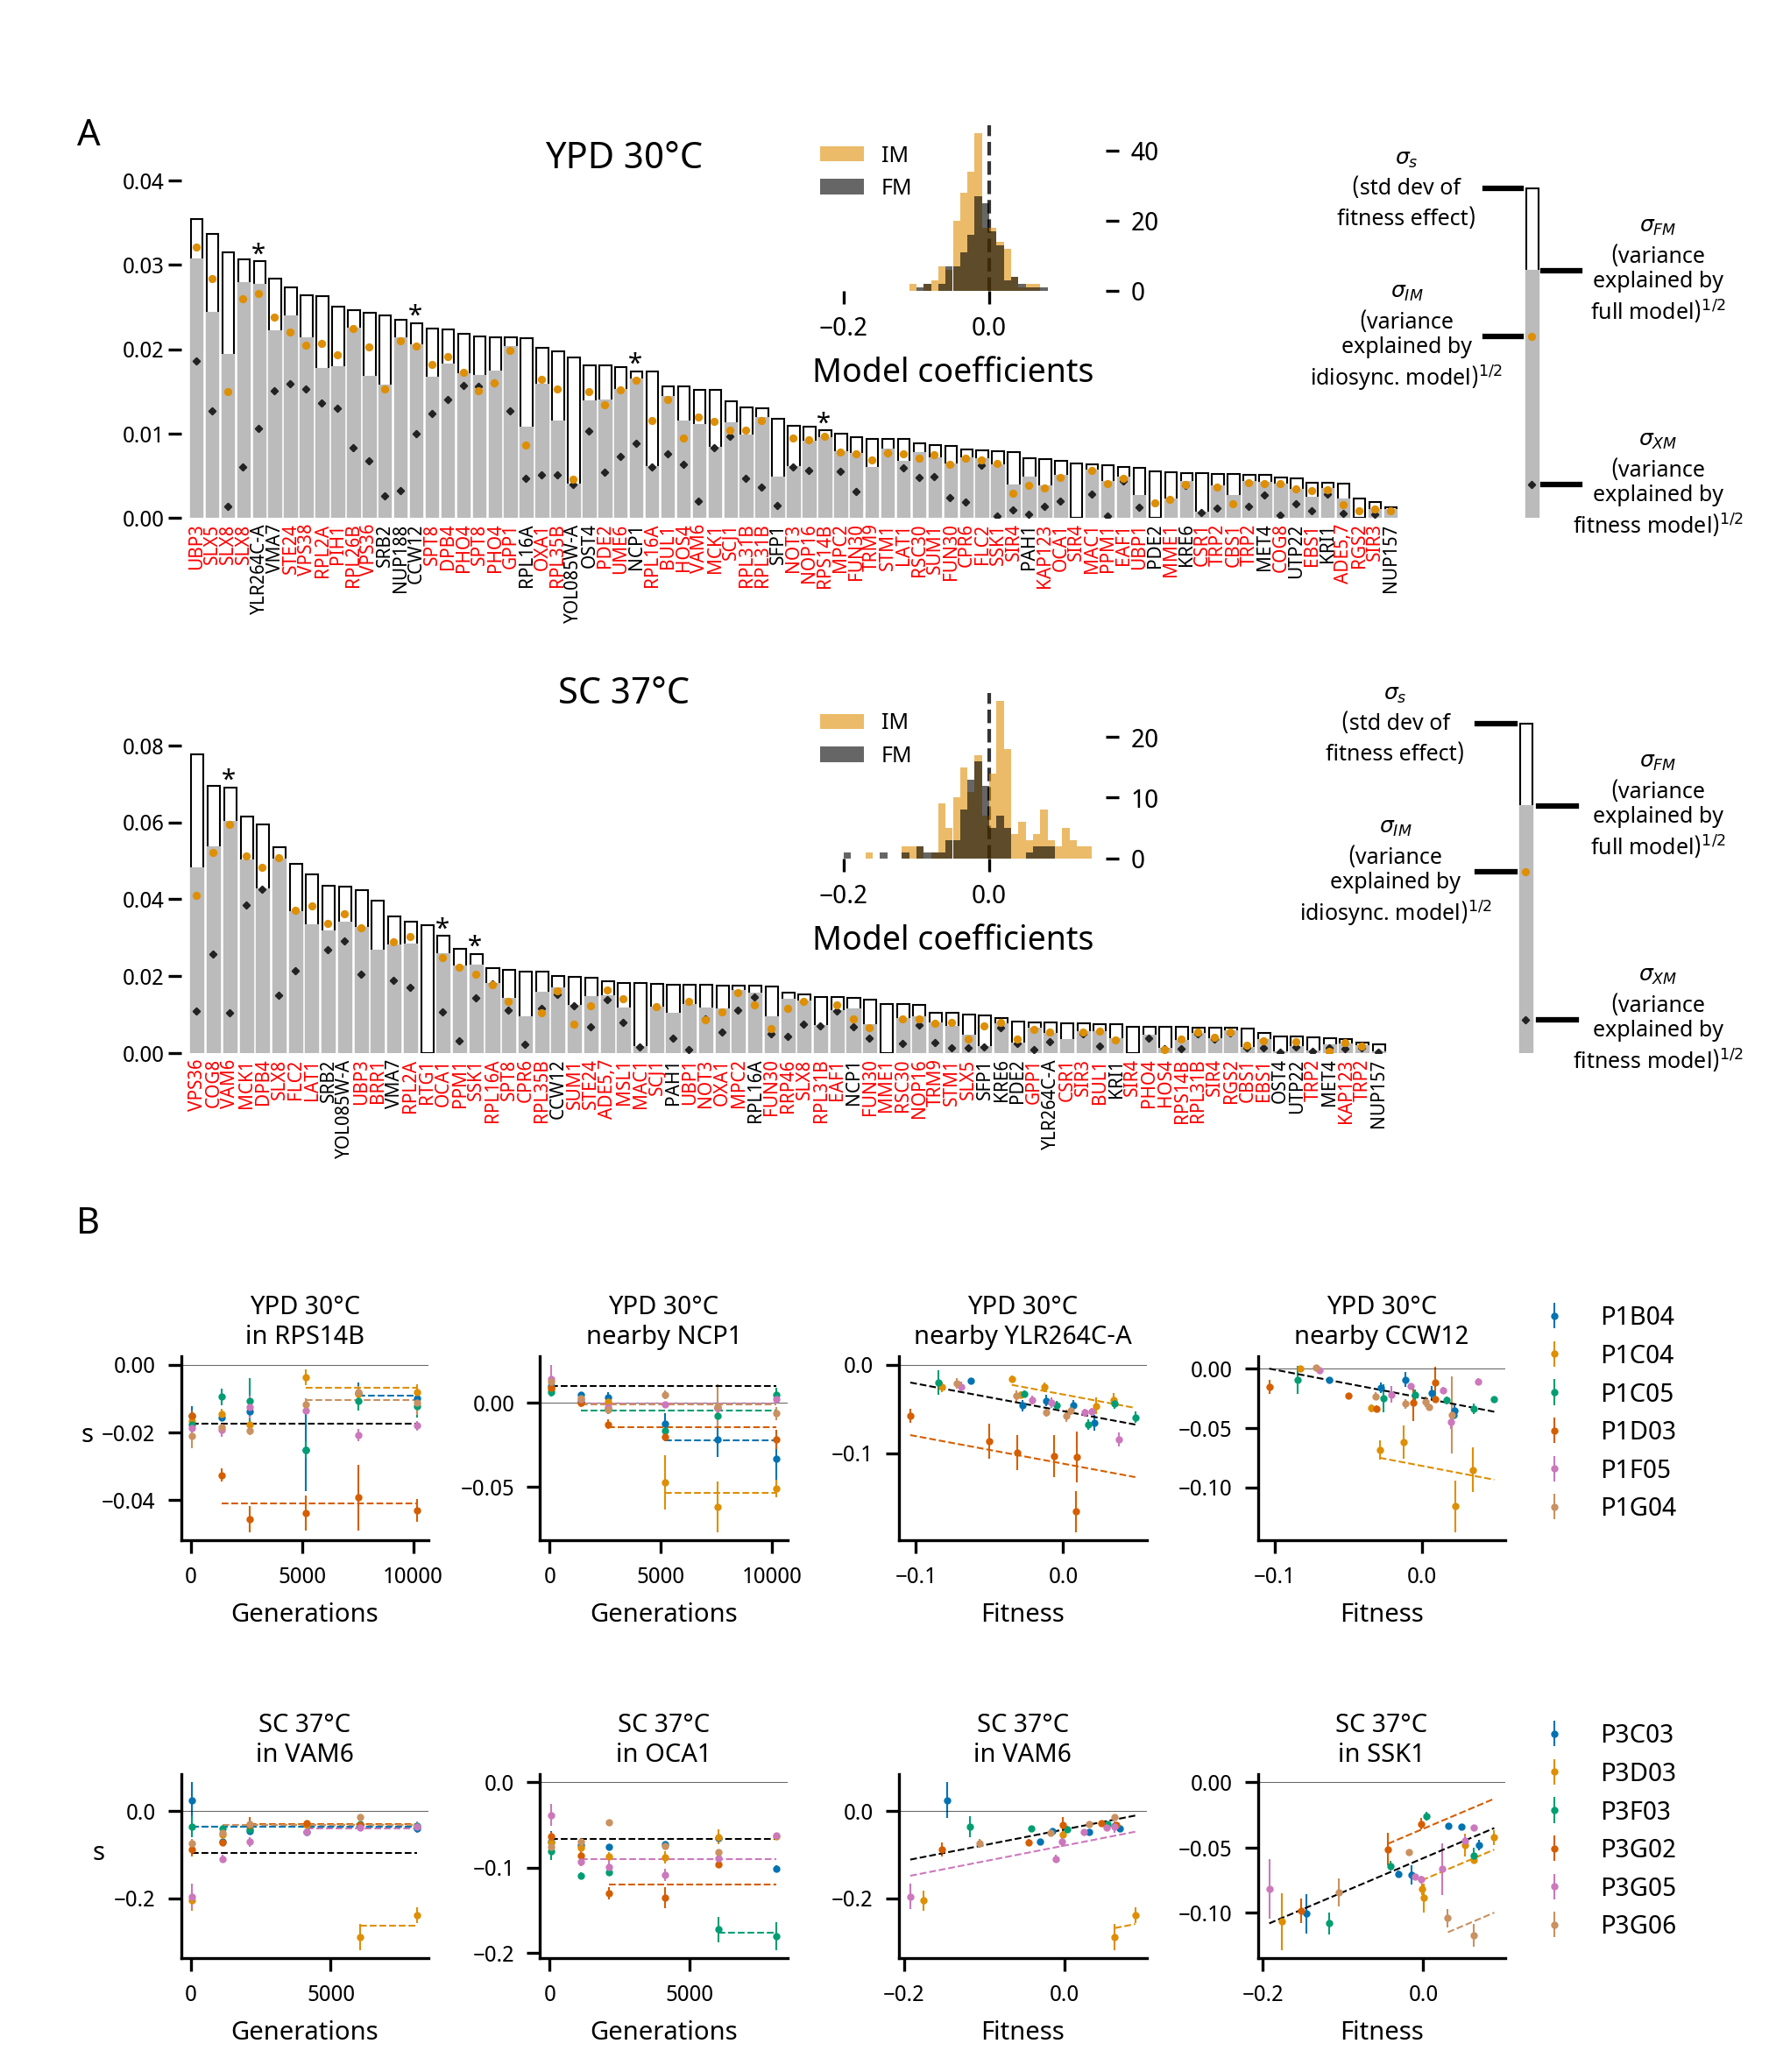

In [13]:
def determinant_plot(cond, top_sub, ex_edges, plot_example=True):

    df = edge_stats[(pd.notnull(edge_stats[cond+'_IM_Coeffs'])) & (edge_stats.Type=='Experiment')].sort_values(cond+'_s_var', ascending=False)
    print(len(df), 'edges')
    gene_descrips = list(df['Gene_Use'])
    edges_in_order = list(df['Edge'])
    example_loc = len(df)+8
    xbars = np.array([i for i in range(len(df))] + [example_loc])

    top_sub.tick_params(axis='y', which='major', labelsize=6, pad=1)
    top_sub.tick_params(axis='x', which='major', labelsize=4.5, pad=-2)
    top_sub.set_xlim([-1, len(gene_descrips)+16])
    mv = np.max(np.sqrt(df[cond+'_s_var']))*1.1
    ex_dev, ex_full, ex_qtl, ex_x = mv, mv*0.75, mv*0.55, mv*0.1
    if plot_example:
        top_sub.bar(xbars, list(np.sqrt(df[cond+'_s_var'])) + [ex_dev], color='none', edgecolor='black', lw=0.5, width=0.75)
        if cond != 'P3_YPD_30C': 
            top_sub.bar(xbars, list(np.sqrt(df[cond+'_FM_R2']*df[cond+'_s_var'])) + [ex_full], color='#BBBBBB', edgecolor='#BBBBBB', lw=0.5, width=0.75)
            top_sub.scatter(xbars-0.05, list(np.sqrt(df[cond+'_XM_R2']*df[cond+'_s_var'])) + [ex_x], color='#222222', marker='x', zorder=3, s=1.5)
        top_sub.scatter(xbars-0.05, list(np.sqrt(df[cond+'_IM_R2']*df[cond+'_s_var'])) + [ex_qtl], color=colors[1], marker='o', zorder=4, s=1.5)
    else:
        top_sub.bar(xbars[:-1], list(np.sqrt(df[cond+'_s_var'])), color='none', edgecolor='black', lw=0.5, width=0.75)
        if cond != 'P3_YPD_30C': 
            top_sub.bar(xbars[:-1], list(np.sqrt(df[cond+'_FM_R2']*df[cond+'_s_var'])), color='#BBBBBB', edgecolor='#BBBBBB', lw=0.5, width=0.75)
            top_sub.scatter(xbars[:-1]-0.05, list(np.sqrt(df[cond+'_XM_R2']*df[cond+'_s_var'])), color='#222222', marker='x', zorder=3, s=1.5)
        top_sub.scatter(xbars[:-1]-0.05, list(np.sqrt(df[cond+'_IM_R2']*df[cond+'_s_var'])), color=colors[1], marker='o', zorder=4, s=1.5)
    pl.axes(top_sub)
    pl.xticks(xbars, [i.split(' ')[1] for i in gene_descrips], rotation='vertical', fontsize=5)
    ticks = top_sub.get_xticklabels()
    cd = {'in': 'red', 'nearby': 'black'}
    jnk = [ticks[i].set_color(cd[gene_descrips[i].split(' ')[0]]) for i in range(len(gene_descrips))]
    if plot_example:
        if cond != 'P3_YPD_30C': 
            top_sub.annotate('$\sigma_{XM}$\n(variance\nexplained by\nfitness model)$^{1/2}$', xy=(example_loc+8, ex_x), xycoords='data', fontsize=6, ha='center', va='center')
            top_sub.plot([example_loc+0.7, example_loc+3], [ex_x, ex_x], c='k')
            top_sub.annotate("$\sigma_{FM}$\n(variance\nexplained by\nfull model)$^{1/2}$", xy=(example_loc+8, ex_full), xycoords='data', fontsize=6, ha='center', va='center')
            top_sub.plot([example_loc+0.7, example_loc+3], [ex_full, ex_full], c='k')
            
        top_sub.annotate('$\sigma_s$\n(std dev of\nfitness effect)', xy=(example_loc-8, ex_dev), xycoords='data', fontsize=6, ha='center', va='center')
        top_sub.plot([example_loc-0.7, example_loc-3], [ex_dev, ex_dev], c='k')
        top_sub.annotate('$\sigma_{IM}$\n(variance\nexplained by\nidiosync. model)$^{1/2}$', xy=(example_loc-8, ex_qtl), xycoords='data', fontsize=6, ha='center', va='center')
        top_sub.plot([example_loc-0.7, example_loc-3], [ex_qtl, ex_qtl], c='k')

        
    sns.despine(left=True, bottom=True)
    top_sub.tick_params(axis="x", bottom=False)
    
    for edge in ex_edges:
        top_sub.annotate('*', (edges_in_order.index(edge)-0.1, list(np.sqrt(df[cond+'_s_var']))[edges_in_order.index(edge)]), 
                         fontsize=7, zorder=5, horizontalalignment="center")
    
    coeffs = {'IM': [], 'FM': []}
    for edge in edges_in_order:
        if cond != 'P3_YPD_30C':
            fps = str(edge_stats[edge_stats.Edge==edge].iloc[0][cond+'_FM_Params']).split(';')
            FM_cs = str(edge_stats[edge_stats.Edge==edge].iloc[0][cond+'_FM_Coeffs']).split(';')
            coeffs['FM'] += [float(FM_cs[i]) for i in range(len(FM_cs)) if fps[i]!='Fitness_sub_70']
        coeffs['IM'] += [float(i) for i in str(edge_stats[edge_stats.Edge==edge].iloc[0][cond+'_IM_Coeffs']).split(';')][1:]
    return coeffs
        
def plot_hist(coeffs, sub, plot_FM=True):
    print(np.min(coeffs['IM']+coeffs['FM']), np.max(coeffs['IM']+coeffs['FM']))
    bin_lefts = [i*0.01-0.24 for i in range(39)]
    for model in coeffs:
        print(model, len(coeffs[model]), 'coeffs, mean', np.mean(coeffs[model]), ' std dev:', np.std(coeffs[model]))
    sub.hist(coeffs['IM'], bins=bin_lefts, zorder=1, alpha=0.6, color=colors[1], label='IM')
    if plot_FM:
        sub.hist(coeffs['FM'], bins=bin_lefts, zorder=1, alpha=0.6, color="k", label='FM')
    sub.axvline(0, zorder=0, color='#333', linestyle='dashed', lw=1)
    sub.set_xlabel('Model coefficients', fontsize=9)
    #sub.set_ylim([0,top])
    #sub.set_yticks([0,20])
    sub.legend(frameon=False, fontsize=6)
    sub.yaxis.tick_right()
    sub.tick_params(which='both', labelsize=7)
    sns.despine(ax=sub, bottom=True, left=True)

def plot_one_det(sub, cond, edge, model, axis_color, title_cond=True, ms=2, xlabel=True, title_at_all=True):
    td = vtn_s[(vtn_s['Edge']==edge) & (vtn_s['Cond']==cond) & (vtn_s['num_cbcs']>=5)]
    sub.axhline(0, color='k', linewidth=0.25, alpha=0.6)
    xvar = {'FM': 'Fitness', 'IM': 'Gen', 'IM2': 'Gen'}[model]
    for pop in cond_pops[cond.split('_')[0]]:
        ttd = td[td.Pop==pop].sort_values('Gen')
        if xvar == 'Gen':
            gen_rec = [gen_fixer[g][cond.split('_')[0]] for g in ttd['Gen']]
            sub.errorbar(x=gen_rec, y=ttd['s'], yerr=ttd['stderr'], linestyle='', marker='.', markersize=ms, linewidth=0.5, color=color_map[pop], label=pop)
        else:
            sub.errorbar(x=ttd[xvar], y=ttd['s'], yerr=ttd['stderr'], linestyle='', marker='.', markersize=ms, linewidth=0.5, color=color_map[pop], label=pop)
    if xlabel: 
        sub.set_xlabel({'Gen': 'Generations', 'Fitness': 'Fitness'}[xvar], fontsize=7)
    gene = edge_stats[edge_stats.Edge==edge].iloc[0]['Gene_Use']
    if title_cond:
        sub.set_title(cond_to_title[cond] + '\n' + gene, fontsize=7, y=0.95)
    elif title_at_all:
        sub.set_title(gene, fontsize=7, y=0.95)
    
    #sub.set_ylim([-0.15, 0.1])
    sub.tick_params(which='both', labelsize=6, colors=axis_color)
    sub.spines['bottom'].set_color(axis_color)
    sub.spines['left'].set_color(axis_color)
    #fit lines
    fit = edge_stats[edge_stats.Edge==edge].iloc[0]
    if pd.notnull(fit[cond+'_'+model+'_Params']):
        params = fit[cond+'_'+model+'_Params'].split(';')
        cs = fit[cond+'_'+model+'_Coeffs'].split(';')
        coeffs = {params[i]: float(cs[i]) for i in range(len(params))}
        if model == 'IM': 
            coeffs['Fitness_sub_70'] = 0
            coeffs['Intercept'] = td['g70_s'].iloc[0]
        elif model == 'FM':
            coeffs['Intercept'] = td['g70_s'].iloc[0]-g70_fits[cond]*coeffs['Fitness_sub_70']
        if xvar == 'Gen':
            x_rec = [gen_fixer[g][cond.split('_')[0]] for g in td['Gen']]
        else:
            x_rec = td[xvar]
        xlims = [np.min(x_rec), np.max(x_rec)]
        sub.plot(xlims, [i*coeffs['Fitness_sub_70']+coeffs['Intercept'] for i in xlims], c='k', linestyle='dashed', lw=0.5)
        for coef in [c for c in coeffs if c not in ['Fitness_sub_70', 'Intercept', 'dummy']]:
            if xvar == 'Gen':
                xlims[0] = np.min([gen_fixer[g][cond.split('_')[0]] for g in td[(td['Pop']==coef.split('_')[1]) & (td['Gen']>=int(coef.split('_')[-1]))][xvar]])
            else:
                xlims[0] = np.min(td[(td['Pop']==coef.split('_')[1]) & (td['Gen']>=int(coef.split('_')[-1]))][xvar])
            sub.plot(xlims, [i*coeffs['Fitness_sub_70']+coeffs['Intercept']+coeffs[coef] for i in xlims], c=color_map[coef.split('_')[1]], linestyle='dashed', lw=0.5)


###
### NOTE TO SELF: I think it would be better to have two histograms rather than the overlap
###

ypd_examples = [
    'GAGTGCTTCAAAGTT', # RPS14B
    'TAACCTCGCGCTGAG', # nearby NCP1
    'ATATTGAGTAAGTAC', # YLR-264C-A
    'AGTTTATAAAAAATT', # nearby CCW12
]
sc_examples = [
    'CATTTATGGCTATCT', # VAM6
    'AGAAGACGACGATGA', # OCA1
    #'TTTTGCATTTAGGCG', # MPC2
    'CCAGGATGTACCGCC', # SSK1
]

fig = pl.figure(figsize=(7.25, 9), dpi=300)
gs0 = gridspec.GridSpec(26, 10)
top_gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[:13,:])
subs = [pl.Subplot(fig, top_gs[i]) for i in range(2)] 
jnk = [fig.add_subplot(s) for s in subs]   
pl.subplots_adjust(hspace=0.55, wspace=0.45)
coeff_list = determinant_plot('P1_YPD_30C', subs[0], ypd_examples)
subs[0].set_title('YPD 30°C', fontsize=10, x=0.3, y=0.95)
subs[1].set_title('SC 37°C', fontsize=10, x=0.3, y=0.95)
isub1 = fig.add_axes([0.45, 0.83, 0.16, 0.07])
print('YPD')
plot_hist(coeff_list, isub1)
#plot_heatmap(mat, sub, 'YPD 30°C')
coeff_list = determinant_plot('P3_SC_37C', subs[1], sc_examples)
isub2 = fig.add_axes([0.45, 0.59, 0.16, 0.07])
print('SC')
plot_hist(coeff_list, isub2)
#plot_heatmap(mat, sub, 'SC 37°C')

tmp_gs = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs0[17:20,:9])
subs0 = [pl.Subplot(fig, tmp_gs[j]) for j in range(4)]
jnk = [fig.add_subplot(subs0[j]) for j in range(4)]
tmp_gs = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs0[23:,:9])
subs1 = [pl.Subplot(fig, tmp_gs[j]) for j in range(4)]
jnk = [fig.add_subplot(subs1[j]) for j in range(4)]
#pl.subplots_adjust(hspace=0.8, wspace=0.4)

plot_one_det(subs0[0], 'P1_YPD_30C', 'GAGTGCTTCAAAGTT', 'IM', 'k')
plot_one_det(subs0[1], 'P1_YPD_30C', 'TAACCTCGCGCTGAG', 'IM', 'k')
plot_one_det(subs0[2], 'P1_YPD_30C', 'ATATTGAGTAAGTAC', 'FM', 'k') 
plot_one_det(subs0[3], 'P1_YPD_30C', 'AGTTTATAAAAAATT', 'FM', 'k') 
plot_one_det(subs1[0], 'P3_SC_37C', 'CATTTATGGCTATCT', 'IM', 'k')
plot_one_det(subs1[1], 'P3_SC_37C', 'AGAAGACGACGATGA', 'IM', 'k') 
plot_one_det(subs1[2], 'P3_SC_37C', 'CATTTATGGCTATCT', 'FM', 'k') 
plot_one_det(subs1[3], 'P3_SC_37C', 'CCAGGATGTACCGCC', 'FM', 'k')
subs0[-1].legend(frameon=False, bbox_to_anchor=(1,1.4), fontsize=7)
subs1[-1].legend(frameon=False, bbox_to_anchor=(1,1.4), fontsize=7)
subs0[0].set_ylabel('s', rotation='horizontal', fontsize=7)
subs1[0].set_ylabel('s', rotation='horizontal', fontsize=7)
jnk = [sns.despine(ax=subs0[j]) for j in range(4)]
jnk = [sns.despine(ax=subs1[j]) for j in range(4)]

pl.annotate('A', fontsize=10, xy=(0.05, 0.93), xycoords="figure fraction", horizontalalignment="center")
pl.annotate('B', fontsize=10, xy=(0.05, (26-16)/26+0.02), xycoords="figure fraction", horizontalalignment="center")

fig.savefig('../../Figures/Determinants.pdf', background='transparent', bbox_inches='tight', pad_inches=0.1)


70 edges


/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


-0.22346404853287868 0.14681966639900348
IM 171 coeffs, mean -0.008803900458382911  std dev: 0.05879129940219829
FM 199 coeffs, mean -0.011562093544588174  std dev: 0.06435858835033176


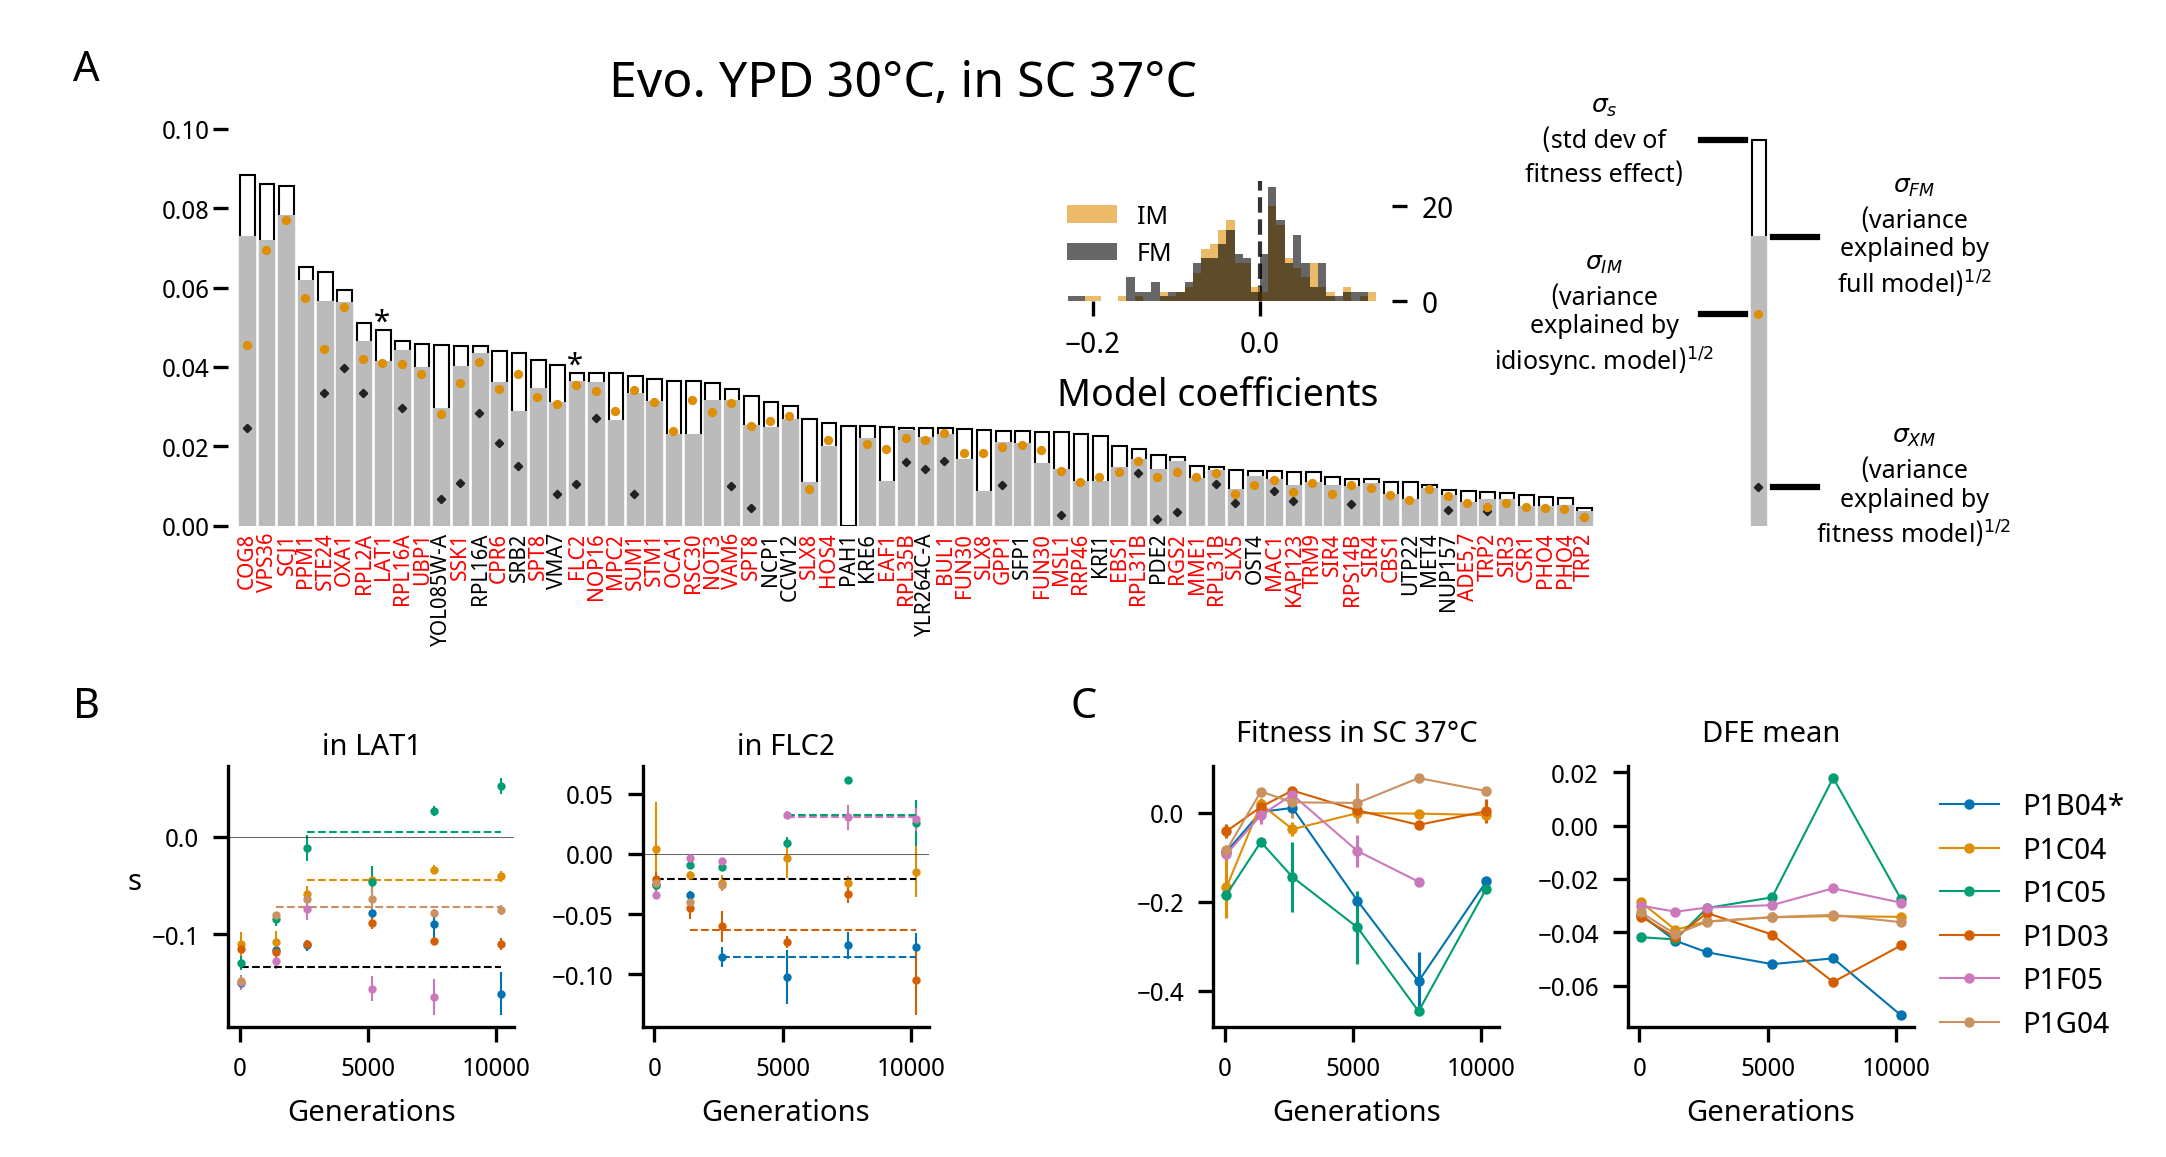

In [14]:
p1_sc_examples = [
    'CTAAGCAGTCTTCTC', # in_LAT1_
    'TGATCATCACGGGAC', # in_FLC2_
    #'TTTAACTCACCGTAA', # nearby_SFP1_
]

fig = pl.figure(figsize=(7.25, 4), dpi=300)
gs0 = gridspec.GridSpec(13, 14)
top_gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[:6,:])
sub = pl.Subplot(fig, top_gs[0])
fig.add_subplot(sub)  


coeff_list = determinant_plot('P1_SC_37C', sub, p1_sc_examples)
sub.set_title(cond_to_title['P1_SC_37C'], fontsize=12, x=0.4, y=1)
isub1 = fig.add_axes([0.5, 0.73, 0.16, 0.1])
plot_hist(coeff_list, isub1)
#plot_heatmap(mat, sub, 'YPD 30°C')

dfe_gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[9:,8:])
dfe_subs = [pl.Subplot(fig, dfe_gs[0]), pl.Subplot(fig, dfe_gs[1])]
jnk = [fig.add_subplot(dfe_subs[i]) for i in range(2)]  
cond = 'P1_SC_37C'
td = vtn_dfe[vtn_dfe.Cond==cond]
for pop in cond_pops[cond.split('_')[0]]:
    ttd = td[td.Pop==pop].sort_values('Gen')
    gen_rec = [gen_fixer[g][cond.split('_')[0]] for g in ttd['Gen']]
    if sci_stats.linregress(gen_rec, ttd['DFE_mean'])[3]<0.05:
        lab = pop+'*'
    else:
        lab = pop
    #if len(ttd[ttd['Fitness_std']==0]) > 0:
    #    print('Missing errors for', cond, pop, list(ttd[ttd['Fitness_std']==0]['Gen']))
    dfe_subs[0].errorbar(x=gen_rec, y=ttd['Fitness'], yerr=ttd['Fitness_std'], linestyle='-', marker='.', markersize=3, elinewidth=0.75, linewidth=0.5, color=color_map[pop], label=lab)
    dfe_subs[1].plot(gen_rec, ttd['DFE_mean'], linestyle='-', marker='.', markersize=3, linewidth=0.5, color=color_map[pop], label=lab)
dfe_subs[1].set_title('DFE mean', fontsize=7)
dfe_subs[0].set_title('Fitness in SC 37°C', fontsize=7)
dfe_subs[1].legend(frameon=False, bbox_to_anchor=(1, 1), fontsize=7)
for dfe_sub in dfe_subs:
    dfe_sub.tick_params(labelsize=6)
    dfe_sub.set_xlabel('Generations', fontsize=7)
    sns.despine(ax=dfe_sub)

tmp_gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[9:,:6])
subs0 = [pl.Subplot(fig, tmp_gs[j]) for j in range(2)]
jnk = [fig.add_subplot(subs0[j]) for j in range(2)]
pl.subplots_adjust(hspace=0.55, wspace=0.45)
plot_one_det(subs0[0], 'P1_SC_37C', 'CTAAGCAGTCTTCTC', 'IM', 'k', title_cond=False)
plot_one_det(subs0[1], 'P1_SC_37C', 'TGATCATCACGGGAC', 'IM', 'k', title_cond=False) 
#plot_one_det(subs0[2], 'P1_SC_37C', 'TTTAACTCACCGTAA', 'IM', 'k', title_cond=False) 

subs0[0].set_ylabel('s', rotation='horizontal', fontsize=7)
jnk = [sns.despine(ax=subs0[j]) for j in range(2)]

pl.annotate('A', fontsize=10, xy=(0.04, 0.93), xycoords="figure fraction", horizontalalignment="center")
pl.annotate('B', fontsize=10, xy=(0.04, 0.38), xycoords="figure fraction", horizontalalignment="center")
pl.annotate('C', fontsize=10, xy=(0.5, 0.38), xycoords="figure fraction", horizontalalignment="center")

fig.savefig('../../Figures/P1_SC_37C_all.pdf', background='transparent', bbox_inches='tight', pad_inches=0.1)
